## Fertilizer Recommendation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost
from xgboost import XGBClassifier

import pickle


import tensorflow as tf

In [3]:
df = pd.read_csv('Fertilizer.csv')

In [4]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [5]:
df.dtypes

Temparature         int64
Humidity            int64
Moisture            int64
Soil Type          object
Crop Type          object
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer Name    object
dtype: object

In [6]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [8]:
df = df.rename(columns={'Humidity ': 'Humidity'})

In [9]:
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

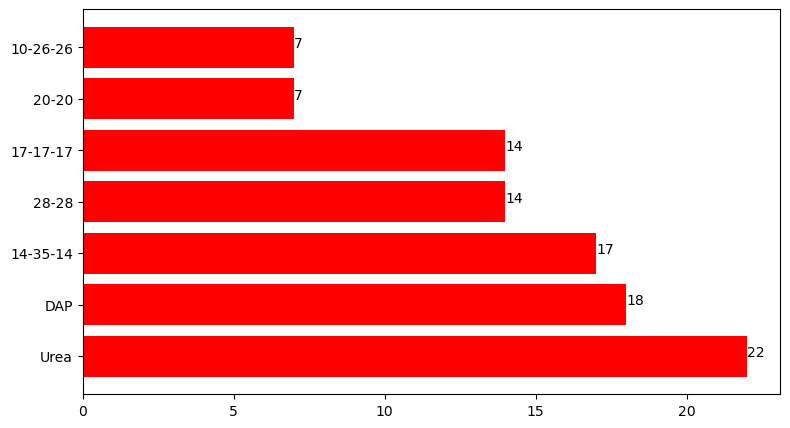

In [10]:
labels = df["Fertilizer Name"].unique()
counts = list(df["Fertilizer Name"].value_counts())

plt.figure(figsize = (9,5))
plt.barh(labels, counts,color='red')
  
for index, value in enumerate(counts):
    plt.text(value, index,
             str(value))
plt.show()

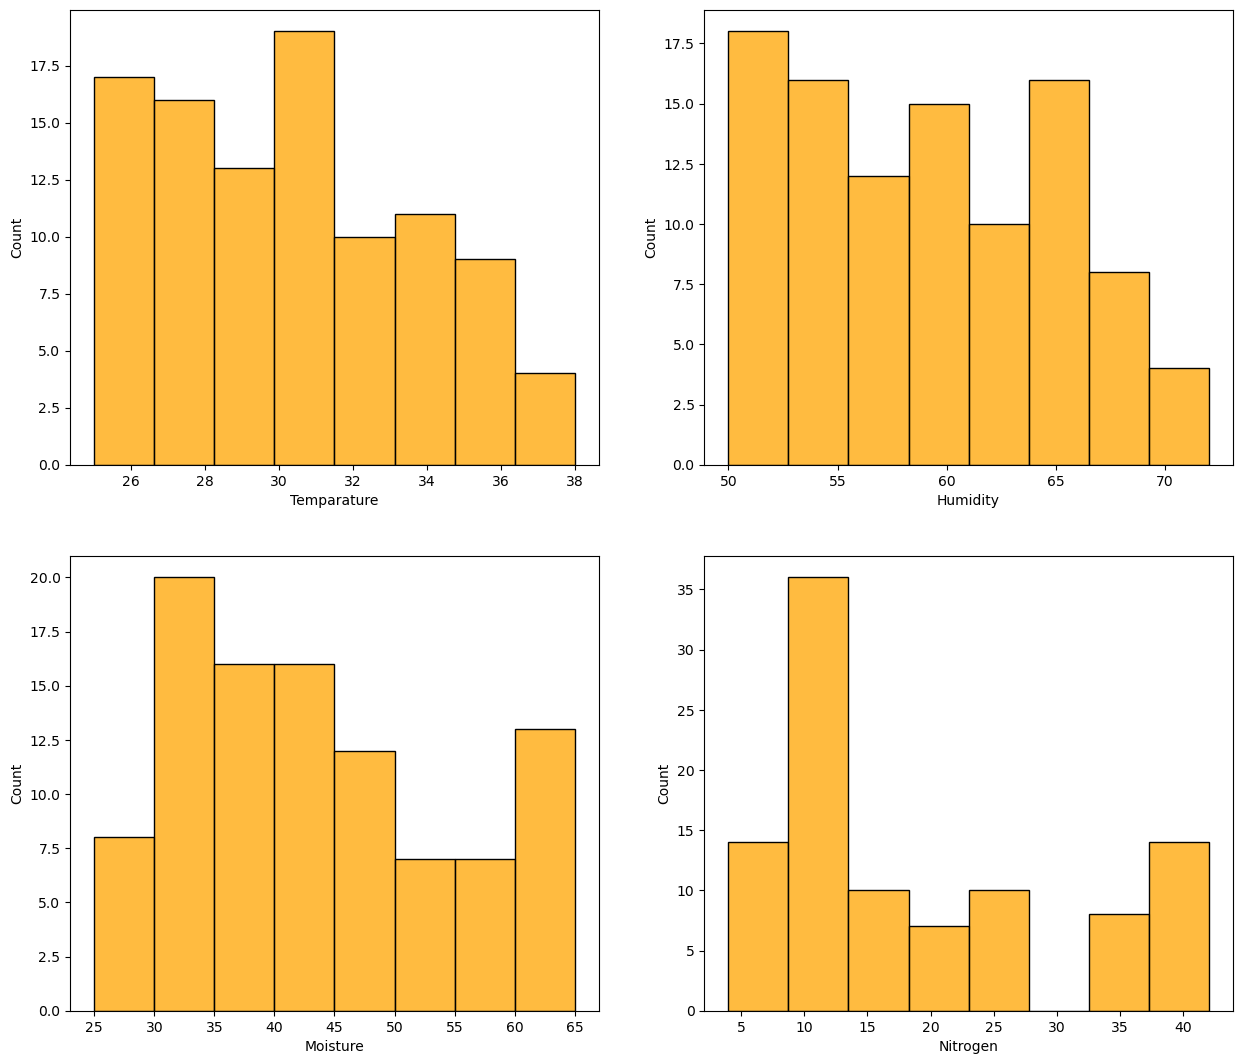

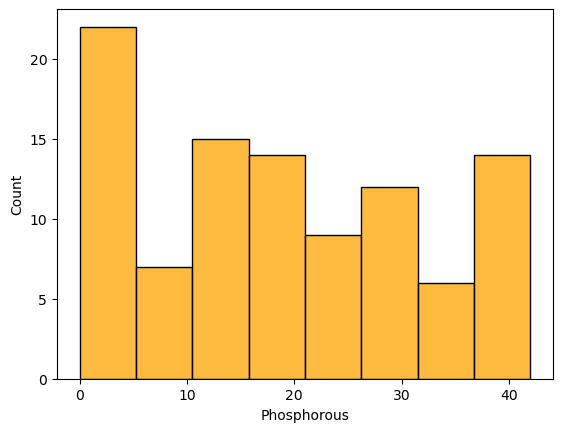

In [11]:
columns = ['Temparature','Humidity','Moisture','Nitrogen','Phosphorous']

plt.figure(figsize=(15,13))
i = 1
for column in columns[:-1]:
    plt.subplot(2,2,i)
    sns.histplot(df[column],color='orange')
    i+=1
plt.show()

sns.histplot(df[columns[-1]],color='orange')
plt.show()

<Figure size 3000x2000 with 0 Axes>

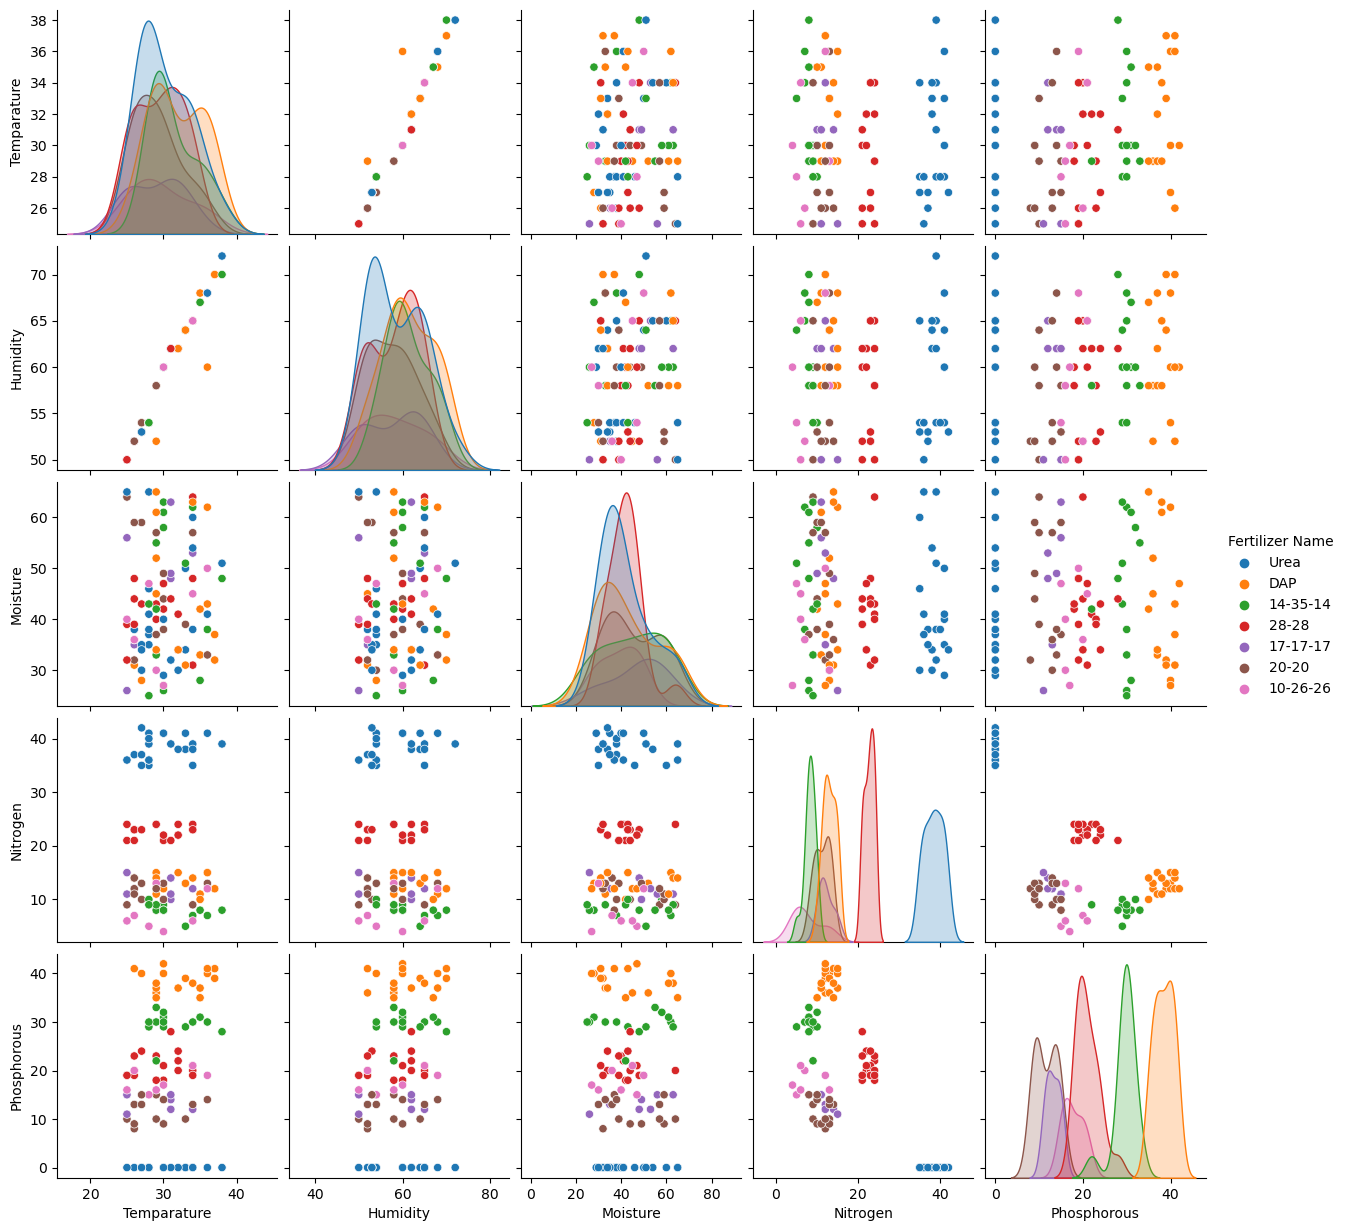

In [12]:
plt.figure(figsize=(30,20))
sns.pairplot(df[columns + ["Fertilizer Name"]], hue = "Fertilizer Name")
plt.show()

In [13]:
soil_type_label_encoder = LabelEncoder()
df["Soil Type"] = soil_type_label_encoder.fit_transform(df["Soil Type"])
crop_type_label_encoder = LabelEncoder()
df["Crop Type"] = crop_type_label_encoder.fit_transform(df["Crop Type"])

In [14]:
fertname_label_encoder = LabelEncoder()
df["Fertilizer Name"] = fertname_label_encoder.fit_transform(df["Fertilizer Name"])

In [15]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6


In [16]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [17]:
counter = Counter(y)
counter

Counter({6: 22, 5: 18, 1: 14, 4: 17, 2: 7, 3: 14, 0: 7})

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 0)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (79, 8), (79,)
Train Data: (20, 8), (20,)


Accuracy at k = 1 is 0.75
Accuracy at k = 2 is 0.75
Accuracy at k = 3 is 0.7
Accuracy at k = 4 is 0.6
Accuracy at k = 5 is 0.65
Accuracy at k = 6 is 0.6
Accuracy at k = 7 is 0.45
Accuracy at k = 8 is 0.45
Accuracy at k = 9 is 0.5
Accuracy at k = 10 is 0.5
Accuracy at k = 11 is 0.55
Accuracy at k = 12 is 0.65
Accuracy at k = 13 is 0.65
Accuracy at k = 14 is 0.65
Accuracy at k = 15 is 0.65
Accuracy at k = 16 is 0.65
Accuracy at k = 17 is 0.65
Accuracy at k = 18 is 0.6
Accuracy at k = 19 is 0.55
Accuracy at k = 20 is 0.6
Accuracy at k = 21 is 0.6
Accuracy at k = 22 is 0.6
Accuracy at k = 23 is 0.6
Accuracy at k = 24 is 0.6
Accuracy at k = 25 is 0.6
Accuracy at k = 26 is 0.6
Accuracy at k = 27 is 0.6
Accuracy at k = 28 is 0.55
Accuracy at k = 29 is 0.55
Accuracy at k = 30 is 0.5
Accuracy at k = 31 is 0.5
Accuracy at k = 32 is 0.5
Accuracy at k = 33 is 0.5
Accuracy at k = 34 is 0.45
Accuracy at k = 35 is 0.45
Accuracy at k = 36 is 0.4
Accuracy at k = 37 is 0.4
Accuracy at k = 38 is 0.4
Accu

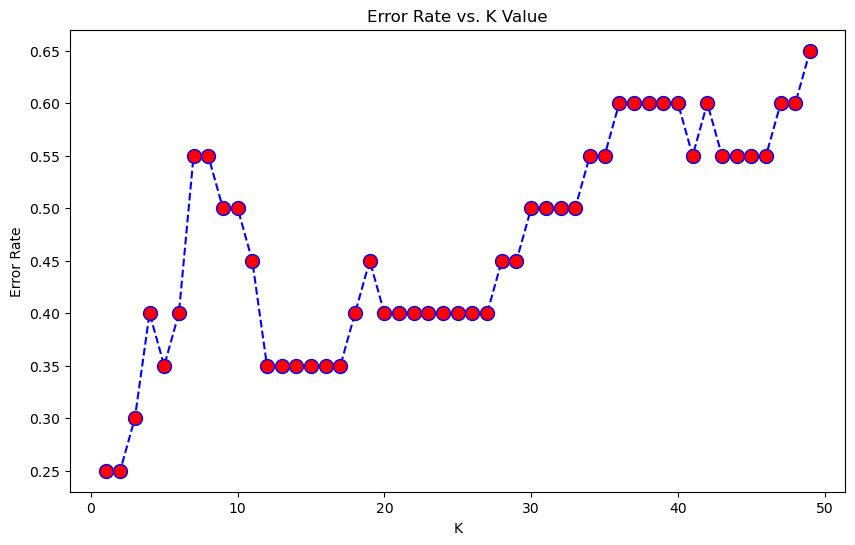

In [19]:
error_rate = []
for i in range(1, 50):
    pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = i))
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy at k = {i} is {accuracy}")
    error_rate.append(np.mean(predictions != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [20]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred)*100

100.0

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, max_depth=10)

y_pred = clf.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred)*100

90.0

In [22]:
Rf = RandomForestClassifier()
y_pred = Rf.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred) * 100

100.0

In [23]:
svc = SVC()
y_pred = Rf.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred) * 100

100.0

In [24]:
KNN = KNeighborsClassifier()
y_pred = Rf.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred) * 100

100.0

In [25]:
training_feature = X_train[:,0:-1]
training_labels = X_train[:,-1]
testing_feature = X_test[:,0:-1]
testing_labels = X_test[:,-1]

In [26]:
print(training_feature.shape)
print(testing_feature.shape)
print(training_labels.shape)
print(testing_labels.shape)

(79, 7)
(20, 7)
(79,)
(20,)


In [27]:
pickle.dump(gnb, open('Fertlizer.pkl', 'wb'))